# Coverage Analysis - Sudipta

> COMP 4710 Group 11 - Progress Report 1

## Objective

- Compute coverage statistics across neighbourhoods
- Identify underserved areas (bottom quartile)
- Detect coverage outliers using IQR method
- Compare coverage across community areas

In [1]:
# automatically relodes modules when they are changed
# no need to restart kernel when coverage files are changed
%load_ext autoreload
%autoreload 2


In [2]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt

# Project imports
from ptn_analysis import get_stops_per_neighbourhood, get_stops_per_community

#import the functions from ptn_analysis.analysis.coverage
#1.compute_coverage_statistics,
#2.identify_underserved_neighbourhoods,
#3.detect_coverage_outliers,
#4.compute_coverage_by_area,
#5.compare_community_coverage,
import ptn_analysis.analysis.coverage as coverage


print("Imports loaded successfully")

Imports loaded successfully


In [3]:
# Load data
neighbourhood_data = get_stops_per_neighbourhood()
community_data = get_stops_per_community()
print(f"Loaded {len(neighbourhood_data)} neighbourhoods and {len(community_data)} communities")

2026-02-06 18:30:36.663 | INFO     | ptn_analysis.data.db:get_duckdb:42 - Connected to DuckDB at C:\Users\sarke\OneDrive\WinnipegTransitProject\ywg-ptn-analysis-4710-g11\data\processed\wpg_transit.duckdb


Loaded 237 neighbourhoods and 12 communities


In [4]:
# Preview data
neighbourhood_data.head()

,neighbourhood,area_km2,stop_count,stops_per_km2
0,Rossmere-A,3.978106,64,16.088058
1,St. James Industrial,4.646884,61,13.127076
2,Windsor Park,3.353475,60,17.891888
3,River Park South,4.421495,59,13.343903
4,Inkster Industrial Park,2.936009,57,19.414107


## Coverage Statistics

In [6]:
# Compute summary statistics
stats = coverage.compute_coverage_statistics()
print("Coverage Statistics:")
for key, value in stats.items():
    print(f"  {key}: {value}")

Coverage Statistics:
  total_neighbourhoods: 237
  total_stops: 3873
  mean_stops: 16
  median_stops: 12
  std_stops: 14
  min_stops: 0
  max_stops: 64
  zero_stop_areas: 16
  mean_density_per_km2: 12.800988850370715


## Underserved Neighbourhoods

In [8]:
# Find underserved areas (bottom 25%)
underserved = coverage.identify_underserved_neighbourhoods(threshold_percentile=25.0)
print(f"Found {len(underserved)} underserved neighbourhoods:")
underserved

Found 60 underserved neighbourhoods:


,neighbourhood,area_km2,stop_count,stops_per_km2
225,Kensington,0.105249,0,0.000000
226,North Transcona Yards,0.871373,0,0.000000
227,Maple Grove Park,1.018090,0,0.000000
228,La Barriere,14.876205,0,0.000000
229,Wilkes South,23.366101,0,0.000000
230,Assiniboia Downs,3.910790,0,0.000000
231,St. Vital Perimeter South,36.815616,0,0.000000
232,Perrault,1.961152,0,0.000000
233,Saskatchewan North,13.738621,0,0.000000
234,Kil-Cona Park,2.864876,0,0.000000


## Outlier Detection

In [9]:
# Detect outliers using IQR method
outliers = coverage.detect_coverage_outliers(method='iqr')
print(f"Found {len(outliers)} outliers:")
outliers

Found 15 outliers:


,neighbourhood,stop_count,outlier_type
0,Rossmere-A,64,High
1,St. James Industrial,61,High
2,Windsor Park,60,High
3,River Park South,59,High
4,Inkster Industrial Park,57,High
5,Linden Woods,56,High
6,Dakota Crossing,55,High
7,Fort Richmond,54,High
8,Tyndall Park,53,High
9,Chalmers,51,High


## Coverage by Area

In [13]:
# Rank neighbourhoods by density
coverage_ranked = coverage.compute_coverage_by_area()
print("Top 10 by density:")
coverage_ranked.head(10)

Top 10 by density:


,neighbourhood,area_km2,stop_count,stops_per_km2,density_rank
117,Portage-Ellice,0.169350,12,70.858992,1
131,Central Park,0.232539,12,51.604280,2
176,Portage & Main,0.119114,6,50.372064,3
56,Spence,0.483418,22,45.509228,4
137,Edgeland,0.270360,11,40.686446,5
167,Civic Centre,0.198625,8,40.276997,6
127,Exchange District,0.319155,12,37.599312,7
101,St. Vital Centre,0.429758,15,34.903398,8
19,West Alexander,1.395339,43,30.816889,9
213,China Town,0.065942,2,30.329668,10


In [14]:
print("Bottom 10 by density:")
coverage_ranked.tail(10)

Bottom 10 by density:


,neighbourhood,area_km2,stop_count,stops_per_km2,density_rank
227,La Barriere,14.876205,0,0.0,222
228,Maple Grove Park,1.018090,0,0.0,222
229,North Transcona Yards,0.871373,0,0.0,222
230,Wilkes South,23.366101,0,0.0,222
231,Kil-Cona Park,2.864876,0,0.0,222
232,Kensington,0.105249,0,0.0,222
233,Trappistes,6.417752,0,0.0,222
234,St. Vital Perimeter South,36.815616,0,0.0,222
235,Saskatchewan North,13.738621,0,0.0,222
236,Perrault,1.961152,0,0.0,222


## Community Comparison

In [17]:
# Compare communities
community_stats = coverage.compare_community_coverage()
community_stats

,community,area_km2,stop_count,stops_per_km2,density_rank,coverage_category
3,Downtown,16.311507,364,22.315535,1,High
11,Point Douglas,10.864817,197,18.131920,2,High
8,Inkster,18.083426,245,13.548318,3,High
9,River Heights,18.088211,232,12.826033,4,High
1,River East,34.652921,404,11.658469,5,High
7,Transcona,28.754517,265,9.215943,6,High
2,St. Boniface,47.616673,389,8.169407,7,High
0,Fort Garry,76.990095,628,8.156893,8,High
6,Seven Oaks,39.845054,300,7.529165,9,High
4,St. James - Assiniboia,59.221982,340,5.741111,10,High


## Summary

In [25]:
stats = coverage.compute_coverage_statistics()
underserved = coverage.identify_underserved_neighbourhoods(threshold_percentile=25.0)

summary = {
    "Total neighbourhoods": stats["total_neighbourhoods"],
    "Mean stops/neighbourhood": round(stats["mean_stops"], 2),
    "Zero-stop areas": stats["zero_stop_areas"],
    "Underserved count (bottom 25%)": len(underserved),
}

summary_df = pd.DataFrame(
    summary.items(),
    columns=["Metric", "Value"]
)

summary_df



,Metric,Value
0,Total neighbourhoods,237
1,Mean stops/neighbourhood,16
2,Zero-stop areas,16
3,Underserved count (bottom 25%),60


In [23]:
# Top 10 / Bottom 10 by stop_count (for report)
top10_stops = neighbourhood_data.sort_values("stop_count", ascending=False).head(10)
bottom10_stops = neighbourhood_data.sort_values("stop_count", ascending=True).head(10)

print("Top 10 neighbourhoods by stop_count:")
top10_stops[["neighbourhood", "stop_count", "area_km2", "stops_per_km2"]]

Top 10 neighbourhoods by stop_count:


,neighbourhood,stop_count,area_km2,stops_per_km2
0,Rossmere-A,64,3.978106,16.088058
1,St. James Industrial,61,4.646884,13.127076
2,Windsor Park,60,3.353475,17.891888
3,River Park South,59,4.421495,13.343903
4,Inkster Industrial Park,57,2.936009,19.414107
5,Linden Woods,56,3.609936,15.512742
6,Dakota Crossing,55,3.832735,14.350066
7,Fort Richmond,54,4.599052,11.741551
8,Tyndall Park,53,3.013996,17.584630
9,Chalmers,51,2.520368,20.235144


In [24]:
print("\nBottom 10 neighbourhoods by stop_count:")
bottom10_stops[["neighbourhood", "stop_count", "area_km2", "stops_per_km2"]]


Bottom 10 neighbourhoods by stop_count:


,neighbourhood,stop_count,area_km2,stops_per_km2
221,Cloutier Drive,0,0.820553,0.0
222,Assiniboia Downs,0,3.910790,0.0
223,Kil-Cona Park,0,2.864876,0.0
236,Perrault,0,1.961152,0.0
235,Saskatchewan North,0,13.738621,0.0
234,St. Vital Perimeter South,0,36.815616,0.0
233,Armstrong Point,0,0.265781,0.0
232,Turnbull Drive,0,1.096329,0.0
231,Trappistes,0,6.417752,0.0
230,Wilkes South,0,23.366101,0.0


## Export Results

Save results to reports/figures/

In [27]:
# Example: Save underserved to CSV
top10_stops.to_csv("../reports/figures/top10_neighbourhoods_by_stops.csv", index=False)
bottom10_stops.to_csv("../reports/figures/bottom10_neighbourhoods_by_stops.csv", index=False)
# underserved.to_csv("reports/figures/underserved_neighbourhoods.csv", index=False)

In [32]:
# Recompute key tables (so exports are up to date)
underserved = coverage.identify_underserved_neighbourhoods(threshold_percentile=25.0)
outliers = coverage.detect_coverage_outliers(method="iqr")
community_stats = coverage.compare_community_coverage()

# Export for report / sharing
underserved.to_csv("../reports/figures/underserved_neighbourhoods_bottom25.csv", index=False)
outliers.to_csv("../reports/figures/coverage_outliers_iqr.csv", index=False)
community_stats.to_csv("../reports/figures/community_coverage_comparison.csv", index=False)

print("Exported:")
print(" - reports/figures/top10_neighbourhoods_by_stops.csv.csv")
print(" - reports/figures/bottom10_neighbourhoods_by_stops.csv.csv")
print(" - reports/figures/underserved_neighbourhoods_bottom25.csv")
print(" - reports/figures/coverage_outliers_iqr.csv")
print(" - reports/figures/community_coverage_comparison.csv")


Exported:
 - reports/figures/top10_neighbourhoods_by_stops.csv.csv
 - reports/figures/bottom10_neighbourhoods_by_stops.csv.csv
 - reports/figures/underserved_neighbourhoods_bottom25.csv
 - reports/figures/coverage_outliers_iqr.csv
 - reports/figures/community_coverage_comparison.csv


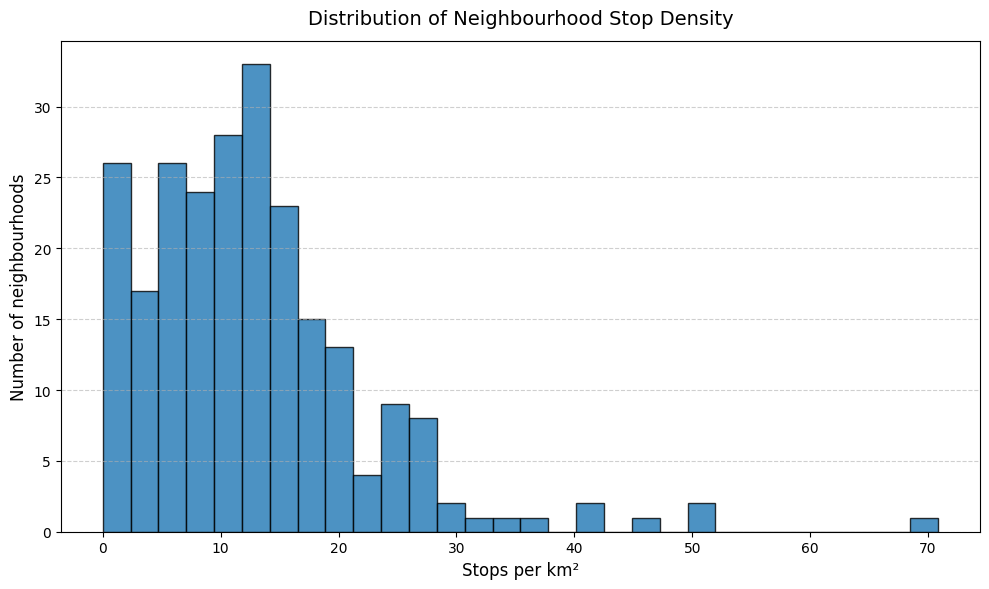

Saved plot to reports/figures/neighbourhood_density_hist.png


In [37]:
# Histogram of neighbourhood stop density (stops per km^2)
# Histogram of neighbourhood stop density (stops per km^2)
plt.figure(figsize=(10, 6))

plt.hist(
    df["stops_per_km2"].dropna(),
    bins=30,
    edgecolor="black",
    alpha=0.8
)

plt.title("Distribution of Neighbourhood Stop Density", fontsize=14, pad=12)
plt.xlabel("Stops per km²", fontsize=12)
plt.ylabel("Number of neighbourhoods", fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Save for report (SAVE BEFORE SHOW)
plt.savefig("../reports/figures/neighbourhood_density_hist.png", dpi=200)

plt.show()

print("Saved plot to reports/figures/neighbourhood_density_hist.png")



# Methodology Note

Neighbourhood/community areas were approximated from polygon area in degrees² using latitude-based km conversion (Winnipeg ~50°N) to compute stops per km².

## Interpretation

Stop coverage is uneven across Winnipeg neighbourhoods. While the average is about 16 stops per neighbourhood (237 total neighbourhoods), coverage is concentrated in certain areas and absent in others. For example, the highest stop-count neighbourhoods include Rossmere-A (64 stops), St. James Industrial (61), Windsor Park (60), River Park South (59), and Inkster Industrial Park (57), indicating strong stop presence in those zones. In contrast, several neighbourhoods have zero stops (e.g., Cloutier Drive, Assiniboia Downs, Kil-Cona Park, Perrault), which aligns with the broader result that there are 16 zero-stop neighbourhoods and 60 underserved neighbourhoods (bottom quartile by stop density). This suggests transit stop access is highly variable by location and that a meaningful subset of neighbourhoods may be underserved.

#### 1. Non-trivial number of zero-service areas

16 neighbourhoods have 0 stops, which strongly indicates areas with no stop coverage (or coverage outside the polygon boundaries). These should be flagged as priority candidates for “underserved” discussion and for checking whether they are parks/industrial/perimeter zones.

#### 2. Underserved areas are common (bottom quartile)

The bottom-quartile analysis identifies 60 neighbourhoods as underserved by stop density. Many of these are near-zero density, suggesting limited walk-up access to stops in those areas compared to the city median.

#### 3. Coverage is skewed; a few neighbourhoods dominate stop counts

Outlier detection found 15 high outlier neighbourhoods by stop count (IQR method). This indicates stop placement is concentrated in a small set of neighbourhoods (likely major corridors, transfer points, and dense residential/commercial areas), while most neighbourhoods sit far below those levels.

---
**Results by : Sudipta Sarker (7910584) COMP 4710 - University of Manitoba**